# Métodos III - Derivadas 

## Parametrización de lineas y de superficies


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela.*

Versión: enero 2020


In [4]:
import time
print(' Last version ', time.asctime() )

 Last version  Tue Feb  4 19:27:01 2020


### Objectivos


Presentar a introducir los conceptos de:

* Parametrización de líneas
    
* Parameterización de superficies

Y asociarlos a las trayectorias de móviles en física clásica y a las gráficas de funciones escalares.

También adelantaremos cálculos como el de la longitud de una línea.


In [5]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

### Parametrización de líneas

Considera la siguiente función:

$$
 {\bf r} (t) = \left( r \cos \omega \,t \, , \; r \sin \omega \, t \right)  
$$

Date cuenta que **es una función vectorial** de $t \in \mathrm{R} \mapsto {\bf r}(t) \in \mathrm{R}^2$.

Puedes asociar esta función a la trayectoria de un móvil a lo largo de una circunferencia de radio $r$ con velocidad angular $\omega$ donde la $t$ sería el tiempo.

También se trata de la parametrización de una circunferencia de radio $r$. 

En la siguiente celda dibujamos esta trayectoria, la circunferencia, con *Python*. Por comodidad tomaremos $r = 1, \, \omega = 1$ y $t$ recorrerá el intervalo $[0, 2 \pi]$. Fíjate cómo lo hacemos.


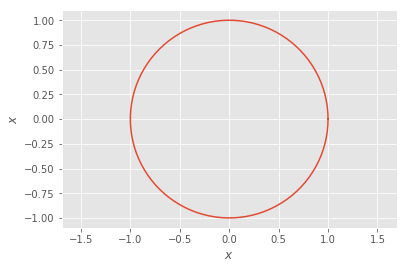

In [6]:
ts = np.linspace(0., 2*np.pi, 100)
r, w = 1., 1.
xs = r * np.cos(w * ts)
ys = r * np.sin(w * ts)
plt.plot(xs, ys);
plt.xlabel('$x$'); plt.ylabel('$x$'); plt.axis('equal');


En general, podremos expresar una línea en el espacio, siempre que no se cruce consigo misma, mediante una función vectorial que asigne a valores contiguos de $t$ dentro de un intervalo, $[t_0, t_{e}]$ de $\mathrm{R}$, puntos contiguos, ${\bf r}(t)$, en el espacio $\mathrm{R}^n$, con $n >1$.

Estoy seguro que en física has parametrizado antes diversas trayectorias, circunferencias, parábolas, hélices y otras más, en función de $t$, que era el *tiempo*.



La siguiente parametrización corresponde a una hélice en el eje $z$:

$$
 {\bf r} (t) = \left( r \cos \omega \,t \, , \; r \sin \omega \, t , \; v_z \, t \right)  
$$

O también a un móvil, una partícula, que gira en una circunferencia con radio $r$ y velocidad angular $\omega$ en el plano $(x, y)$ mientras avanza en el tiempo $t$, a lo largo del eje $z$ con velocidad $v_z.$

Vamos a dibujarla. Por comodidad tomamos $r = 1, \omega =1, v_z =1$ y $t = [0, 8 \pi]$. Esto es, dibujamos cuatro vueltas de la circunferencia.

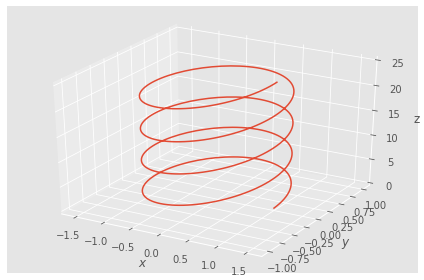

In [14]:
ts = np.linspace(0., 8*np.pi, 400)
r, w, vz = 1., 1., 1.
xs = r  * np.cos(w * ts)
ys = r  * np.sin(w * ts)
zs = vz * ts
fig = plt.figure(); ax = fig.gca(projection='3d')
ax.plot(xs, ys, zs)
plt.xlabel('$x$'); plt.ylabel('$y$'); ax.set_zlabel('z'); plt.axis('equal')
plt.tight_layout();

*Explora* ahora la trayectoria cambiando los parámetros $r, \omega, v_z$ y el intervalo de $t$.


*Ejercicio*: Intenta parametrizar y dibujar la trayectoria que describe un punto de una rueda de radio $r$ de una bicicleta caundo esta se desplaza horizontal y en lína recta con velocidad $v_x$.

*solución*:
    
En un periodo $T$ la rueda ha recorrido $2 \pi r $ distancia que corresponde a $v_x T$, luego la frecuencia de rotación es $ \omega = 2 \pi /T = v_x /r$. También en tiempo $t$, la bicleta ha recorrido $v_x t$, que corresponde a la longitud de arco de circunferencia que ha girado, y por lo tanto a un ángulo $v_x t / r$.

El punto empeza en $(0, 0)$.

Así tenemos:

$
x(t) = v_x t - r \sin(v_x t/r) 
$

$
y(t) = r \, (1 - \cos(v_x t/r))
$

Es una *cicloide*.


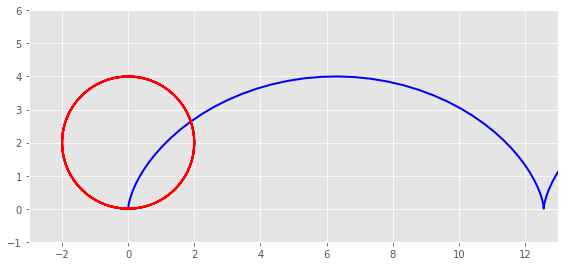

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
v, r = 2., 2.
ts = np.linspace(0., 4*np.pi*r, 200)
xs = v*ts - r* np.sin(v*ts/r)
ys = r*(1-np.cos(v*ts/r))
ax.plot(xs, ys, color='blue', lw=2)
xxs = r*np.sin(v*ts/r)
ax.plot(xxs, ys, color='red', lw=2)
ax.set_ylim((-1., 6.)); ax.set_xlim((-3., 13.))
#ax.set_xlabel($x$); ax.set_ylabel('$y$')
ax.set_aspect('equal'); fig.tight_layout();

#### Longitud de arco


Fíjate en el código *Python* con el que dibujamos antes la circunfencia. La figura *parece* una cincunferencia. Pero en realidad estamos dibujando segmentos que unen puntos de la circunferencia, solo que están tan próximos que el resultado final se *aproxima* a una circunferencia.

La siguiente figura muestra una sección de ese dibujo, donde hemos marcados los puntos para que se vean más claros los segmentos.


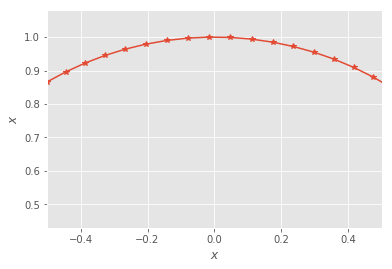

In [29]:
nbins = 100
ts = np.linspace(0., 2*np.pi, nbins)
r, w = 1., 1. 
xs = r * np.cos(w * ts)
ys = r * np.sin(w * ts)
plt.plot(xs, ys, '*-');
plt.xlabel('$x$'); plt.ylabel('$x$'); plt.axis('equal');
plt.xlim((-0.5, 0.5)); plt.ylim((0.5, 1.01));

Considera ahora que queremos calcular la longitud la longitud de la circunferencia a partir de esos segmentos. ¿Sabrías hacerlo? Bastaría con calcular la longitud de cada uno de esos segmentos y luego sumarlos.

Es lo que hacemos en la siguiente celda. El error que cometemos en la determinación de la longitud depende del número de puntos con los que dibujemos la circunferencia. A mayor número de puntos, menor error.

*Explora* cuántos puntos hacen falta hasta tener un error menor de 1 por cien mil.

In [30]:
circunferencia = 0.
for i in range(1, nbins):
    dx = xs[i] - xs[i-1]
    dy = ys[i] - ys[i-1]
    dr = np.sqrt(dx*dx + dy*dy)
    circunferencia += dr
print('longitud de la circunferencia ', circunferencia)
print('la longitud de una circunferencia de radio unidad es ', 2* np.pi)

longitud de la circunferencia  6.282130832617387
la longitud de una circunferencia de radio unidad es  6.283185307179586


En este caso, como las funciones componentes de la función vectorial son funciones de una dimensión, sabemos ya operar con ellas, derivarlas y hacer su desarrollo de Taylor. 

Consideremos la parametrización de la circunferencia con radio $r$, $\omega = 1$ e intervalo temporal $[0, 2\pi]$.
Las derivadas de la funciones componentes son:

$$
x(t) = r \cos  t   \rightarrow x'(t) = - r \sin  t 
$$
$$
y(t) = r \sin  t   \rightarrow y'(t) =   r \cos  t 
$$

Y a partir de ellas, hacemos el desarrollo de Taylor de primer orden, desde un tiempo $t_0$ a un tiempo próximo $t_0 + \Delta t$, donde $\Delta t$ es "pequeño".

$$
x(t_0 + \Delta t)  = x(t_0) - r  \sin  t  \; \Delta t 
$$
$$
y(t_0 + \Delta t)  = y(t_0) + r  \cos  t  \; \Delta t 
$$



Por lo tanto la distancia entre dos puntos es:
$$ 
\Delta r   = || {\bf r}(t_0 + \Delta t) - {\bf r}(t_0) || 
$$

$$
\Delta r = \sqrt{r^2  \sin^2 t + r^2 \cos^2 t} \, \Delta t = r \, \Delta t
$$

Si la diferencia de intervalos temporales es infinitisemal, $\Delta t \rightarrow \mathrm{d} t$, la suma de todos los segmentos, $s$, se convierte en la integral en $t$ entre los extremos de su intervalo $[0, 2 \pi]$.

$$
s = \int_{0}^{2 \pi} r \mathrm{d}t = r \, t \, \big|_{0}^{2 \pi} = 2 \pi r 
$$

Y obtenemos la longitud de una circunferencia, $2 \pi r$.


Sea entonces una línea ${\bf r}(t)$ en un espacio $\mathrm{R}^n$, con $n>1$, parametrizada en función de una variable real $t$ que toma valores en el intervalo $[t_0, t_e]$, podemos dar su longitud, su **longitud de arco**, $s$, mediante la integral en una dimensión:
    
$$
s = \int_{t_0}^{t_e} || {\bf r}' (t) || \, \mathrm{d}t
$$

Donde:
$$
{\bf r}' (t) = \left( x'_1(t), \dots, x'_n(t) \right)
$$

*Nota*: Date cuenta que ${\bf r}'(t)$ en el caso de que $t$ sea el tiempo y ${\bf r}(t)$ la trayectoria de un móvil a lo largo del tiempo es ¡*la velocidad*!



*Ejercicio*: Considera ahora la parametrización anterior de la hélice. ¿Puedes calcular su longitud de arco? 

Es más, ¿podrías *re-parametrizar* la hélice pero ahora utilizando su longitud? 

Imagina para ello que se trata de un móvil que recorre la hélice con velocidad angular $\omega = 1$ y velocidad en $z$, $v_z = 1$. ¿Puedes decir en qué punto se encuentra el móvil en la hélice cuando haya recorrido una distancia $s$? Esto es, ¿puedes dar ${\bf r}(s)$, donde $s$ es la longitud recorrida?

### Introducción a la parametrización de superficies


Fíjate en la siguiente figura. Es la superficie del lateral de un cilindro vertical cuya base es un disco. Observa cómo está dibujada la superfice. 


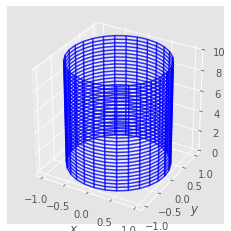

In [31]:
phis = np.linspace(0., 2*np.pi, 30)
zs   = np.linspace(0.,      10, 30)
pms, zms = np.meshgrid(phis, zs)
r = 1.
xms = r  * np.cos(pms)
yms = r  * np.sin(pms)
fig = plt.figure(); ax = fig.gca(projection='3d')
ax.plot_wireframe(xms, yms, zms, color = 'blue', alpha = 0.8)
plt.xlabel('$x$'); plt.ylabel('$y$'); ax.set_zlabel('z'); ax.set_aspect('equal')

Si cortases la pared del cilindro a lo largo de una línea vertical y la desplegases, tendrías una hoja cuadriculada.

Podríamos hacer el proceso al revés. Cogemos una hoja cuadrículada, cuyas coordenadas podemos llamar $(u, v)$, y la enrollamos hasta obtener un cilíndro. Cada punto en el espacio del cilindro $(x, y, z)$ podemos darlo a partir de las variables $(u, v)$. 

Esto es, la superficie lateral del cilindro se puede dar, parametrizar, como **una función vectorial** de dos variables $(u, v)$.



En general, podemos especificar una superficie en el espacio mediante una función vectorial, $\sigma(u, v)$, que asocie puntos contiguos $(u, v)$ en una región $\mathcal{R}$ de $\mathrm{R}^2$ a puntos contiguos en el espacio de tres dimensiones, $\mathrm{R}^3$.

$$
(u, v) \in \mathcal{R} \subset \mathrm{R}^2 \mapsto \left( x(u,v), \; y(u, v), \; z(u, v) \right) \in \mathrm{R}^3
$$

En el caso del cilindro, las variables iniciales son $(\phi, z)$ y la región, $\mathcal{R}$ está definida por los intervalos $z \in [0, 10]$ y $\phi \in [0, 2 \pi]$. La superficie esta parametrizada con la siguiente función:
$$
\sigma(z, \phi) = \left( r \cos \phi, \;  r \sin \phi, \; z \right)
$$
donde $r$ es una constante. En este caso, $x$ e $y$ no dependem de $z$, solo de $\phi$.

Algo similar habíamos ya visto con las gráficas de una función escalar, $f(x, y)$. 

Observa la siguiente gráfica y la región $\mathcal{R}$ en el plano $(x, y)$.

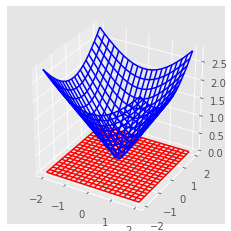

In [34]:
xs  = np.linspace(-2., 2., 20)
ys  = np.linspace(-2., 2., 20)
xms, yms = np.meshgrid(xs, ys)
rms =  np.sqrt( xms*xms + yms*yms)
fig = plt.figure(); ax = fig.gca(projection='3d')
ax.plot_wireframe(xms, yms,    rms, color='blue')
ax.plot_wireframe(xms, yms, 0.*rms, color='red' );
ax.set_aspect('equal');

Es este caso la región $\mathcal{R} = [-2, 2] \times [-2, 2]$ es la zona en rojo, y las variables $(u, v)$ son simplemente $(x, y)$. La superfice está es azul y su parametrización es muy sencilla:
$$
\sigma(x, y) = \left(x, y, \sqrt{x^2 + y^2} \right)
$$
Luego una gráfica de una función es también la parametrización de su superficie.

*Ejercicio*: Observa la siguiente figura y estudia el código *Python* que la crea. Se trata de la parametrización de una esfera de radio unidad. ¿Qué interpretación das a las variables *phis* y *thetas* del código? ¿Puedes reescribir matemáticamente, esto es, dar la región $\mathcal{R}$ donde están definidas las variables $(\theta, \phi)$ y la parametrización $\sigma (\theta, \phi)$ de la esfera?

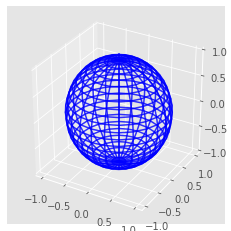

In [35]:
thetas  = np.linspace(0.,    np.pi, 25)
phis    = np.linspace(0,  2.*np.pi, 25)
thetams, phims = np.meshgrid(thetas, phis)
r  = 1.
xms  = r * np.sin(thetams) * np.cos(phims)
yms  = r * np.sin(thetams) * np.sin(phims)
zms  = r * np.cos(thetams)
fig = plt.figure(); ax = fig.gca(projection='3d')
ax.plot_wireframe(xms, yms, zms, color='blue', alpha = 0.8); 
ax.set_aspect('equal');

*solución*: La región $\mathcal{R}$ viene dada por las variables $\theta, \phi$ que toman valores en los intervalos $\theta \in [0, \pi]$, y  $\phi \in [0, 2 \pi]$.

La parametrización de la esfera, $\sigma (\theta, \phi)$, con radio $r$, es:

$$
x(\theta, \phi)  = r \, \sin(\theta) \, \cos(\phi) 
$$
$$
y(\theta, \phi)  = r \, \sin(\theta) \, \sin(\phi) 
$$
$$
z(\theta, \phi)  = r \, \cos(\theta) \\
$$


*Por si te ayuda*:

Parametrizar una superficie en el espacio es como si dispusíeramos de un material plano imaginario que pudieramos recortar, para tener una región $\mathcal{R}$, y que luego pudieramos moldear, comprimir o expandir a voluntad en el espacio para crear con él la superficie $\sigma$. 

En el caso de que no comprimamos o estiremos ese material imaginario, el área de la superfice, $\sigma$, corresponde al área de la región $\mathcal{R}$. Ese es el caso de la pared del cilindro del ejemplo anterior. Pero no el de la esfera, ya que para darle forma con ese mágico material tendríamos que comprimirlo y estirarlo.



Supongo que intuyes cómo calcularemos las áreas de las superficies parametrizadas, pero aún no disponemos de todas las herramientas necesarias. Tenemos que esperar al final del capítulo de integrales.

### ¡Aún hay más!

Supongo que sabes que una partícula cargada cuando entra normal a un campo magnético uniforme describe una hélice, como la que hemos dibujado antes.

En física de partículas, la hélice juega un papel fundamental.

Fíjate en esta imagen de 'una' colisión de protones en el detector [ATLAS](https://atlas.cern), donde están reconstruidas las trayectorias de distintas partículas. 

Las partículas están dentro de un campo magnético uniforme, de ahí que describan hélices. Con distinta carga las hélices giran en sentidos opuestos. No ves hélices porque se trata de la proyección sobre el plano $(x, y)$ y porque no llegan a dar un giro completo. Las partículas más energéticas tienen una hélice muy abierta y menos energéticas, más cerrada.


<img src="imgs/atlas_event.png" width="600" />

La imagen corresponde a uno de los primeros sucesos con un Higgs que tomó detector ATLAS en junio del 2012, donde el bosón de Higgs se desintegra a dos muones (en rojo) y dos electrones (en verde). Por supuesto, hay muchas más particulas que las que vienen del Higgs. 

**¡Esto es todo por ahora!**